In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# List all CSV files in the folder
folder_path = 'data'  # update this to your folder
file_names = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

df = pd.read_excel("data/" + file_names[0])

for i in range(1, len(file_names)):
    file = file_names[i]
    df_new_rows = pd.read_excel("data/" + file)
    df = pd.concat([df, df_new_rows])

df = df.reset_index(drop=True)

for i in range(df.shape[0]):
    #df.at[i, "hour"] = df.loc[i, "hour"].hour
    df.loc[i, "Timestamp"] = datetime.datetime.strptime(df.loc[i, "Timestamp"], "%Y-%m-%d %H:%M:%S")

df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["day_of_week_str"] = [date.strftime("%A") for date in df["Timestamp"]]
df["week_day"] = [0 if date in ["Sunday", "Saturday"] else 1 for date in df["Timestamp"]] # weekday=1, non-weekday=0
df["day_of_week_num"] = [date.weekday() for date in df["Timestamp"]] # Monday=0, Sunday=6
df = df.sort_values(by=["day_of_week_num", "Sensor Name"])
df = df.drop(columns="Site")

In [3]:
df.sort_values(by="Timestamp")[df["Sensor Name"]== "Dept 01"]

/var/folders/gz/wbvdwhws46d1kjxt_rfffkc00000gn/T/ipykernel_33789/448608119.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.sort_values(by="Timestamp")[df["Sensor Name"]== "Dept 01"]


,Sensor Name,Timestamp,Reading,day_of_week_str,week_day,day_of_week_num
59256,Dept 01,2024-01-01 00:00:00,2.0,Monday,1,0
59257,Dept 01,2024-01-01 01:00:00,3.0,Monday,1,0
59258,Dept 01,2024-01-01 02:00:00,4.0,Monday,1,0
59259,Dept 01,2024-01-01 03:00:00,6.0,Monday,1,0
59260,Dept 01,2024-01-01 04:00:00,7.0,Monday,1,0
...,...,...,...,...,...,...
59251,Dept 01,2025-08-12 19:00:00,122999.0,Tuesday,1,1
59252,Dept 01,2025-08-12 20:00:00,123010.0,Tuesday,1,1
59253,Dept 01,2025-08-12 21:00:00,123021.0,Tuesday,1,1
59254,Dept 01,2025-08-12 22:00:00,123032.0,Tuesday,1,1


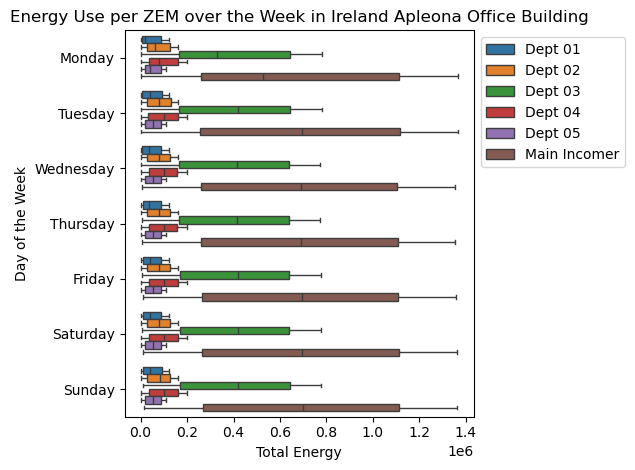

In [4]:
sns.boxplot(y="day_of_week_str", x="Reading", data=df, hue="Sensor Name")
plt.xlabel("Total Energy")
plt.ylabel("Day of the Week")
plt.title("Energy Use per ZEM over the Week in Ireland Apleona Office Building")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

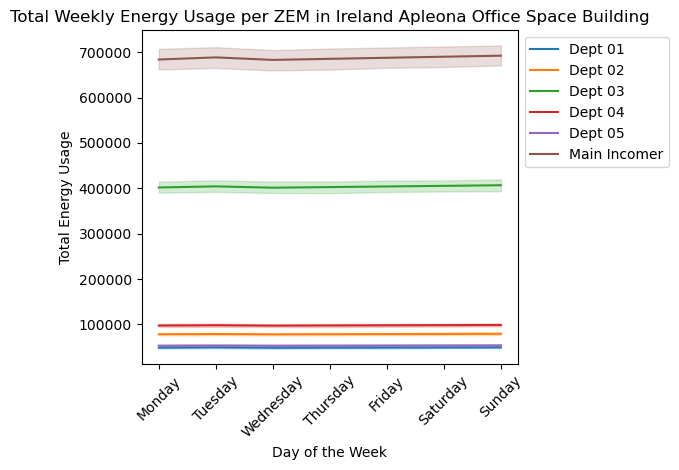

In [5]:
sns.lineplot(data=df, x="day_of_week_num", y="Reading", hue="Sensor Name")
plt.title("Total Weekly Energy Usage per ZEM in Ireland Apleona Office Space Building")
x = [0, 1, 2, 3, 4, 5, 6]
labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.xticks(ticks=x, labels=labels, rotation=45)
plt.xlabel("Day of the Week")
plt.ylabel("Total Energy Usage")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

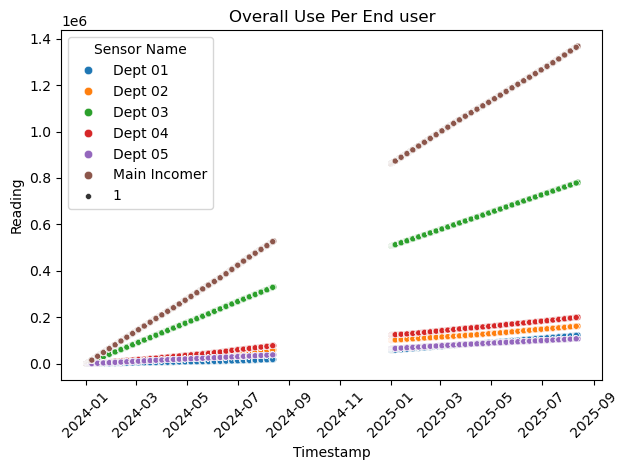

In [6]:
#df1 = df[(df["sensor_2"].isin(["DB04", "DB05"])) & (df["day_of_week_str"].isin(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]))]
sns.scatterplot(data=df, x="Timestamp", y="Reading", hue="Sensor Name", size=1)
plt.xticks(rotation=45)
plt.title("Overall Use Per End user")
plt.tight_layout()

In [7]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Filter rows
result = df[(df["Sensor Name"] == "Dept 03") & 
            (df["Timestamp"].dt.date == datetime.date(2025, 5, 8))]


In [ ]:
from scipy.stats import linregress
def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day

df["Timestamp_num"] = [to_integer(time) for time in df["Timestamp"]]
for end_user in df["Sensor Name"].unique():
    df_end_user = df[df["Sensor Name"] == end_user]
    print(linregress(df_end_user["Timestamp_num"], df_end_user["Reading"]))

LinregressResult(slope=8.306772406698677, intercept=-168125091.11046496, rvalue=0.9585812944041795, pvalue=0.0, stderr=0.023778471720084696, intercept_stderr=481405.3229015357)
LinregressResult(slope=10.329978548386528, intercept=-209056096.4601684, rvalue=0.9589718992519051, pvalue=0.0, stderr=0.029421164792874956, intercept_stderr=595644.0558494738)
LinregressResult(slope=48.46358052179455, intercept=-980762156.815811, rvalue=0.9524360341898329, pvalue=0.0, stderr=0.14938900327831098, intercept_stderr=3024444.2202897687)
LinregressResult(slope=12.61933789457482, intercept=-255385856.46148545, rvalue=0.9549635412036394, pvalue=0.0, stderr=0.03777571914444585, intercept_stderr=764785.5794369322)
LinregressResult(slope=6.874018883415317, intercept=-139113928.43977323, rvalue=0.959087847235142, pvalue=0.0, stderr=0.01954865889587073, intercept_stderr=395770.95445161377)
LinregressResult(slope=86.42009587011071, intercept=-1748924603.7514257, rvalue=0.9577987736557824, pvalue=0.0, stderr=